# NumPy: Linear Algebra

In [2]:
from util import np, scipy, linalg, plt
# from numpy.linalg import eig, inv, matrix_power, svd, qr

## 1. Basic concepts
From now on, the following notations are applied:

- Regular, lowercase letters are used for [scalars]. For example:

$$x=5,\;\alpha=0.2$$

- Bold, lowercase letters are used for [column vectors]. Adding a number in square brackets specifies the entry in the corresponding position. For example:

$$\mathbf{x}=\begin{bmatrix}2\\4\\5\end{bmatrix},\;\mathbf{x}[2]=4$$

- For row vectors, add a transpose operator to the the column form. For example:

$$\mathbf{x}^{\text{T}}=\begin{bmatrix}2 & 4 & 5\end{bmatrix}$$

- Bold, uppercase letters are for [matrices]. Adding $M\times N$ as subscript indicates that the matrix has $M$ rows and $N$ columns. Adding $m,n$ as subscript specifies the entry in the $m^{th}$ row and the $n^{th}$ column. For example:

$$\mathbf{A}_{3\times4}=\begin{bmatrix}1&2&3&4\\5&6&7&8\\9&10&11&12\end{bmatrix},\;\mathbf{A}_{2,3}=\mathbf{A}[2,3]=7$$

[scalars]: https://en.wikipedia.org/wiki/Scalar_(mathematics)
[column vectors]: https://en.wikipedia.org/wiki/Row_and_column_vectors
[matrices]: https://en.wikipedia.org/wiki/Matrix_(mathematics)

### 1.1. Special matrices

In [1]:
from util import np, scipy, linalg, plt

#### Constant matrix
A constant matrix is a matrix where all elements are the same. Popular constant matrices are [zero matrix] and [matrix of ones].

[zero matrix]: https://en.wikipedia.org/wiki/Zero_matrix
[matrix of ones]: https://en.wikipedia.org/wiki/Matrix_of_ones

In [4]:
np.zeros((3,4), dtype=int)

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [5]:
np.ones((4,6), dtype=int)

array([[1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1]])

#### Square matrix
A [square matrix] is a matrix with the same number of rows and columns.

[square matrix]: https://en.wikipedia.org/wiki/Square_matrix

In [6]:
np.random.random((3,3))

array([[0.3636, 0.1811, 0.4987],
       [0.224 , 0.2386, 0.02  ],
       [0.8813, 0.0596, 0.766 ]])

In [5]:
np.arange(9).reshape(3,3)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

#### Unit matrix
A [unit matrix] (sometimes called identity matrix) is a square matrix with ones on the main diagonal and zeros elsewhere, denoted by $\mathbf{I}_N$ where $N$ is the length of each size.

[unit matrix]: https://en.wikipedia.org/wiki/Identity_matrix

In [7]:
np.eye(N=5, dtype=int)

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]])

#### Diagonal matrix
A [diagonal matrix] is a square matrix in which the elements outside the main diagonal are all zero. Given $\mathbf{a}=\begin{bmatrix}1 & 2 & 3\end{bmatrix}^{\text{T}}$, a diagonal matrix can be represented as below:

$$\begin{bmatrix}1&0&0 \\ 0&2&0 \\ 0&0&3 \end{bmatrix}=\text{diag}(\mathbf{a})=\text{diag}(1,2,3)$$

[diagonal matrix]: https://en.wikipedia.org/wiki/Diagonal_matrix

In [3]:
array = np.random.randint(10, size=(4,4))
np.diag(np.diag(array))

array([[4, 0, 0, 0],
       [0, 5, 0, 0],
       [0, 0, 9, 0],
       [0, 0, 0, 6]])

#### Triangular matrix
A [triangular matrix] is a special kind of square matrix, where all entries above or below the main diagonal are $0$. There are two types of triangular matrix: lower and upper.

[triangular matrix]: https://en.wikipedia.org/wiki/Triangular_matrix

In [9]:
array = np.random.randint(10, size=(4,4))
np.tril(array)

array([[3, 0, 0, 0],
       [8, 6, 0, 0],
       [9, 6, 6, 0],
       [9, 5, 1, 5]])

In [10]:
array = np.random.randint(10, size=(4,4))
np.triu(array)

array([[3, 1, 9, 4],
       [0, 6, 5, 5],
       [0, 0, 0, 4],
       [0, 0, 0, 6]])

#### Sparse matrix
Sparse matrix is a large matrix that most of its elements are zero. Our approach is to compress the sparse matrix to storing the non-zero values only (compressed sparse row (CSR) matrix). This leads to significant computational saving.

For example, imagine a matrix where every column is a Netflix movie and each row is a Netflix user, the values are how many times a user has watched a particular movie. That matrix would have thousands of columns and millions of rows. However, since most users have not watched most movies, the vast majority of the matrix values would be zero.

In [4]:
large_matrix = np.array(
    [[0, 0, 0, 0, 0, 4, 0, 0, 7, 0],
     [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
     [3, 0, 0, 0, 0, 0, 0, 0, 8, 0]]
)

np.nonzero(large_matrix)

(array([0, 0, 1, 2, 2]), array([5, 8, 1, 0, 8]))

In [8]:
compressed_matrix = scipy.sparse.csr_matrix(large_matrix)
print(compressed_matrix)

  (0, 5)	4
  (0, 8)	7
  (1, 1)	1
  (2, 0)	3
  (2, 8)	8


### 1.2. Matrix operations

In [1]:
from util import np

#### Addition
The matrices to be used in [addition] (or subtraction) must be of the same shape. The sum of $\mathbf{A}\in\mathbb{R}^{M\times N}$ and $\mathbf{B}\in\mathbb{R}^{M\times N}$ is calculated as:

$$(\mathbf{A}+\mathbf{B})_{m,n} = \mathbf{A}_{m,n} + \mathbf{B}_{m,n}\qquad\text{for }m\in\{1,2,\dots,M\}\text{ and }n\in\{1,2,\dots,N\}$$

[addition]: https://en.wikipedia.org/wiki/Matrix_addition

In [16]:
A = np.array([[1, 2, 3],
              [4, 5, 6]])

In [17]:
B = np.array([[7, 5, 8],
              [2, 0, 7]])

In [18]:
A + B

array([[ 8,  7, 11],
       [ 6,  5, 13]])

In [19]:
B - A

array([[ 6,  3,  5],
       [-2, -5,  1]])

Alternatively, `np.add()` can be used.

In [20]:
np.add(A, B)

array([[ 8,  7, 11],
       [ 6,  5, 13]])

#### Scalar multiplication
For a scalar $c$ and a matrix $\mathbf{A}\in\mathbb{R}^{M\times N}$, the multiplication can be computed: $(c\mathbf{A})_{m,n} = c\cdot \mathbf{A}_{m,n}$

In [21]:
A = np.array([[1, 2, 3],
              [4, 5, 6]])

In [22]:
A * 2

array([[ 2,  4,  6],
       [ 8, 10, 12]])

#### Hadamard product
Also known as [element-wise product], the Hadamard product of two matrices $\mathbf{A}$ and $\mathbf{B}$ of the same size $M\times N$ is a matrix $\mathbf{C}\in\mathbb{R}^{M\times N}$.

$$\mathbf{C}_{m,n}=\mathbf{A}_{m,n}\odot\mathbf{B}_{m,n}$$

[element-wise product]: https://en.wikipedia.org/wiki/Hadamard_product_(matrices)

In [3]:
A = np.linspace(1, 12, 12, dtype=int).reshape(3,4)
A

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [4]:
B = np.linspace(6, 18, 12, dtype=int).reshape(3,4)
B

array([[ 6,  7,  8,  9],
       [10, 11, 12, 13],
       [14, 15, 16, 18]])

In [6]:
A * B

array([[  6,  14,  24,  36],
       [ 50,  66,  84, 104],
       [126, 150, 176, 216]])

#### Matrix multiplication
The [dot product] of $\mathbf{A}\in\mathbb{R}^{M\times N}$ and $\mathbf{B}\in\mathbb{R}^{N\times P}$ is a matrix $\mathbf{C}\in\mathbb{R}^{M\times P}$ where the element of $\mathbf{C}$ in the $m^{th}$ row and $p^{th}$ column is calculated by the formula:
$$\mathbf{C}_{m,p} = \sum_{n=1}^N {\mathbf{A}_{m,n}\mathbf{B}_{n,p}}$$

[dot product]: https://en.wikipedia.org/wiki/Matrix_multiplication

In [23]:
A = np.linspace(1, 6, 6, dtype=int).reshape(2, 3)
B = np.linspace(1, 12, 12, dtype=int).reshape(3, 4)

In [24]:
A

array([[1, 2, 3],
       [4, 5, 6]])

In [25]:
B

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [26]:
np.dot(A, B)

array([[ 38,  44,  50,  56],
       [ 83,  98, 113, 128]])

In [27]:
A @ B

array([[ 38,  44,  50,  56],
       [ 83,  98, 113, 128]])

#### Transposition
[Transposition] is an operator where the matrix is flipped over its diagonal. The transpose of the matrix $\mathbf{A}\in\mathbb{R}^{M\times N}$ is denoted $(\mathbf{A}^{\text{T}})\in\mathbb{R}^{N\times M}$ and satisfies $\mathbf{A}_{m,n}$ = $(\mathbf{A}^{\text{T}})_{n,m}$ for $m\in \{1,2,\dots,M\}$ and $n\in\{1,2,\dots,N\}$.

[Transposition]: https://en.wikipedia.org/wiki/Transpose

In [28]:
A = np.arange(24).reshape(3,8)
A

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23]])

In [29]:
A.T

array([[ 0,  8, 16],
       [ 1,  9, 17],
       [ 2, 10, 18],
       [ 3, 11, 19],
       [ 4, 12, 20],
       [ 5, 13, 21],
       [ 6, 14, 22],
       [ 7, 15, 23]])

In [30]:
np.diag(A) == np.diag(A.T)

array([ True,  True,  True])

#### Properties
Here are some properties of matrix operations:
- $\mathbf{A}+\mathbf{B} = \mathbf{B}+\mathbf{A}$ (commutativity)
- $(c\mathbf{A})^{\text{T}} = c \cdot \mathbf{A}^{\text{T}}$
- $(\mathbf{A}+\mathbf{B})^{\text{T}} = \mathbf{A}^{\text{T}} + \mathbf{B}^{\text{T}}$
- $(\mathbf{A}^{\text{T}})^{\text{T}} = \mathbf{A}$
- $(\mathbf{A}\mathbf{B})\mathbf{C} = \mathbf{A}(\mathbf{B}\mathbf{C}) = \mathbf{A}\mathbf{B}\mathbf{C}$ (associativity)
- $(\mathbf{A}+\mathbf{B})\mathbf{C} = \mathbf{A}\mathbf{C} + \mathbf{B}\mathbf{C}$ (distributivity)
- $\mathbf{A}\mathbf{B} \neq \mathbf{B}\mathbf{A}$

### 1.3. Diagonal and trace

#### The diagonal
To get the [main diagonal] of a matrix, use the [`np.diag()`] function.

[`np.diag()`]: https://numpy.org/doc/stable/reference/generated/numpy.diag.html
[main diagonal]: https://en.wikipedia.org/wiki/Main_diagonal

In [31]:
from util import np

In [32]:
A = np.arange(12).reshape(3,4)
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [33]:
np.diag(A)

array([ 0,  5, 10])

In [34]:
np.diag(A, k=1)

array([ 1,  6, 11])

#### The trace
The [trace] of a square matrix is the sum of the main diagonal elements. Despite that Numpy supports calculating the trace for any type of matrix, Mathematics defines the trace for square matrices only.

[trace]: https://en.wikipedia.org/wiki/Trace_(linear_algebra)

In [35]:
A = np.arange(12).reshape(3,4)
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [36]:
A.trace()

15

In [37]:
np.diag(A).sum()

15

### 1.4. Echelon form and rank

In [2]:
from util import np, linalg

#### Gaussian elimination
[Gaussian elimination] (also known as row reduction) is a linear algebra algorithm for solving a system of linear equations; finding the rank, the determinant and the inverse of matrices. There are three types of elementary matrix operations:
- Interchanging two rows
- Multiplying a row by a non-zero number
- Adding a multiple of a row to another row

[Gaussian elimination]: https://en.wikipedia.org/wiki/Gaussian_elimination

#### Echelon form
Using Gaussian elimination, any matrix can be transformed to the [row echelon form] or column echelon form. From now on, echelon form refers to row echelon.

$$
\begin{bmatrix}
    a & * & * & * & * & * & * & * & * \\
    0 & 0 & b & * & * & * & * & * & * \\
    0 & 0 & 0 & c & * & * & * & * & * \\
    0 & 0 & 0 & 0 & 0 & 0 & d & * & * \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & e & * \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
\end{bmatrix}
$$

A matrix is in echelon form when it satisfies the following conditions:
- All zero rows (rows with all zero elements) are at the bottom.
- Each [pivot] (or leading entry) - the leftmost non-zero element of each row is always to the right of the above pivot. In the example above, $a$, $b$, $c$, $d$ and $e$ are pivots.

[row echelon form]: https://en.wikipedia.org/wiki/Row_echelon_form
[pivot]: https://en.wikipedia.org/wiki/Pivot_element

In [9]:
A = np.array(
    [[0, 1, 2],
     [1, 2, 1],
     [2, 7, 8]]
)
_, _, echelon = linalg.lu(A)
echelon

array([[ 2. ,  7. ,  8. ],
       [ 0. , -1.5, -3. ],
       [ 0. ,  0. ,  0. ]])

#### Rank-nullity theorem
The [rank] of a matrix is the highest number of linear independent rows in the matrix. A vector is linear dependent if it equals to the sum of scalar multiples of other vectors. The maximum rank of the matrix $\mathbf{A}\in\mathbb{R}^{M\times N}$ is $\min(M,N)$. $\mathbf{A}$ is said to be *full rank* if its rank reaches the maximum value and to be *rank deficient* otherwise. This can be expressed using the
[rank-nullity theorem]:

$$\text{rank}(A)+\text{nullity}(A)=\min(M,N)$$

[rank]: https://en.wikipedia.org/wiki/Rank_(linear_algebra)
[rank-nullity theorem]: https://en.wikipedia.org/wiki/Rank%E2%80%93nullity_theorem

In [11]:
np.linalg.matrix_rank(A)

2

### 1.5. Determinant and inverse
These attributes are defined only for square matrices.

In [2]:
from util import np, linalg

#### Minors and cofactors
The [minor] and the cofactor are required to calculate the determinant and the inverse of square matrices. Given a square matrix $\mathbf{A}\in\mathbb{R}^{N\times N}$ and $i,j\in\{1,2,\dots,N\}$:
- The $(i,j)$ minor, denoted $m_{ij}$, is the determinant of the $(N-1)\times(N-1)$ [sub-matrix] formed by deleting the $i^{th}$ row and the $j^{th}$ column.
- The corresponding cofactor is $\mathbf{C}_{i,j}=(-1)^{i+j}\,m_{ij}$.

From the calculated cofactors, we can build the matrix of cofactors ([adjugate matrix]):

$$
\mathbf{C} =
\begin{bmatrix}
\mathbf{C}_{1,1} & \mathbf{C}_{1,2} & \dots  & \mathbf{C}_{1,n}\\
\mathbf{C}_{2,1} & \mathbf{C}_{2,2} & \dots  & \mathbf{C}_{2,n}\\
\vdots  & \vdots  & \ddots & \vdots \\
\mathbf{C}_{n,1} & \mathbf{C}_{n,2} & \dots  & \mathbf{C}_{n,n}
\end{bmatrix}
$$

[minor]: https://en.wikipedia.org/wiki/Minor_(linear_algebra)
[sub-matrix]: https://proofwiki.org/wiki/Definition:Submatrix
[adjugate matrix]: https://en.wikipedia.org/wiki/Adjugate_matrix

#### Determinant
The [determinant] of a $2\times 2$ matrix is:
$
\begin{vmatrix}
a_{1,1} & a_{1,2}\\
a_{2,1} & a_{2,2}
\end{vmatrix}
= a_{1,1}a_{2,2} - a_{1,2}a_{2,1}
$

To calculate the determinant of the matrix $\mathbf{A}\in\mathbb{R}^{N\times N}$ (denoted $|\mathbf{A}|$), use the [Laplace formula] (a recursion with the base case of $N=2$):

$$\det\left(\mathbf{A}\right) = |\mathbf{A}| = \sum_{i=1}^N a_{ij}(-1)^{i+j}m_{ij} = \sum_{i=1}^N a_{ij}C_{ij}$$
where: $i, j \in \{1,2,...,N\}$.

[determinant]: https://en.wikipedia.org/wiki/Determinant
[Laplace formula]: https://en.wikipedia.org/wiki/Laplace_expansion

In [12]:
np.random.seed(0)
A = np.random.randint(1, 10, (5,5))
A

array([[6, 1, 4, 4, 8],
       [4, 6, 3, 5, 8],
       [7, 9, 9, 2, 7],
       [8, 8, 9, 2, 6],
       [9, 5, 4, 1, 4]])

In [14]:
linalg.det(A)

-1552.9999999999998

#### Inverse
The [inverse] of the square matrix $\mathbf{A}\in\mathbb{R}^{N\times N}$ is denoted $\mathbf{A}^{-1}$ and satisfies $\mathbf{A}\cdot\mathbf{A}^{-1} = \mathbf{I}_N$ where $\mathbf{I}_N$ is the unit matrix. $\mathbf{A}$ is invertible only if $|\mathbf{A}| \ne 0$. The formula for inversion is:

$$\mathbf{A}^{-1} = \frac{1}{|\mathbf{A}|}C^{\text{T}}$$

Infered from the above formula, a square matrix having determinant of $0$ has no inverse. Such a matrix is called a *singular matrix*. Otherwise, the matrix is said to be *invertible*.

[inverse]: https://en.wikipedia.org/wiki/Invertible_matrix

In [15]:
A = np.array([[1, 2, 3],
              [0, 1, 4],
              [5, 6, 0]])
linalg.inv(A)

array([[-24.,  18.,   5.],
       [ 20., -15.,  -4.],
       [ -5.,   4.,   1.]])

Let's check if the dot product of $\mathbf{A}$ and $\mathbf{A}^{-1}$ is an identity matrix.

In [16]:
A @ linalg.inv(A).astype(int)

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

### 1.6. Eigenvalues

#### Calculation
[Eigenvalues and eigenvectors] are defined only for square matrices. Each eigenvalue $(\lambda)$ and a corresponding eigenvector $(\mathbf{x})$ of the square matrix $\mathbf{A}$ satisfies: $\mathbf{A}\mathbf{x} = \lambda \mathbf{x}$. To find eigenvalues and eigenvectors:
- Solve the equation: $|\mathbf{A} - \lambda \mathbf{I}| = \mathbf{0}$ (called the [characteristic equation]) for $\lambda$.
- For each value of $\lambda$ found, solve the equation $(\mathbf{A}-\lambda)\;\mathbf{x}=\mathbf{0}$ or use Gaussian elimination to convert the [augmented matrix] $(\mathbf{A} - \lambda \mathbf{I}\mid0)$ to echelon form then solve it as a system of linear equations.  

Note that there are an infinite number of linear dependent eigenvectors associated with a single eigenvalue.

[Eigenvalues and eigenvectors]: https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors
[characteristic equation]: https://en.wikipedia.org/wiki/Characteristic_polynomial
[augmented matrix]: https://en.wikipedia.org/wiki/Augmented_matrix

In [2]:
from util import np

In [17]:
A = np.array([
    [3, 4, -2],
    [1, 4, -1],
    [2, 6, -1]]
)
eigenvalues, eigenvectors = linalg.eig(A)

In [5]:
eigenvalues

array([3., 2., 1.])

In [8]:
eigenvalues.sum()

6.000000000000002

In [11]:
eigenvectors
# each column is an eigenvector

array([[-0.4082,  0.    ,  0.7071],
       [-0.4082,  0.4472, -0.    ],
       [-0.8165,  0.8944,  0.7071]])

In [12]:
eigenvectors[:, 0]

array([-0.4082, -0.4082, -0.8165])

Now calculate the value of $\mathbf{A}\mathbf{x}$ and $\lambda \mathbf{x}$ and check if they are equal.

In [18]:
lhs = A @ eigenvectors[:,0]
rhs = eigenvalues[0] * eigenvectors[:,0]
np.allclose(lhs, rhs)

True

#### Properties
Here are some properties of eigenvalues:
- The sum of all eigenvalues is the same as the trace of $\mathbf{A}$.
- The product of all eigenvalues is the same as the determinant of $\mathbf{A}$.
- The number of eigenvalues equals to the rank of $\mathbf{A}$.
- $\mathbf{A}$ and $\mathbf{A}^T$ have the same set of eigenvalues.

## 2. Decomposition

### 2.1. Eigendecomposition
[Eigendecomposition] of a square matrix $\mathbf{A}\in\mathbb{R}^{N\times N}$ is the factorization that is based on its eigenvalues and eigenvectors and is only applied for [non-defective matrices] (matrices that are diagonizable). $\mathbf{A}$ can be written as:

$$\mathbf{A}=\mathbf{Q}\mathbf{D}\mathbf{Q}^{-1}$$

[Eigendecomposition]: https://en.wikipedia.org/wiki/Eigendecomposition_of_a_matrix
[non-defective matrices]: https://en.wikipedia.org/wiki/Diagonalizable_matrix

In [ ]:
from util import np, linalg

In [20]:
A = np.array(
    [[3, 4, -2],
     [1, 4, -1],
     [2, 6, -1]], dtype=float,
)
eigenvalues, eigenvectors = linalg.eig(A)
D = np.diag(eigenvalues)
Q = eigenvectors

In [22]:
lhs = A
rhs = Q @ D @ linalg.inv(Q)
np.allclose(lhs, rhs)

True

#### Properties
- We can easily prove that: $\mathbf{A}^k=\mathbf{Q}\mathbf{D}^k\mathbf{Q}^{-1}$. By letting $k=-1$, this property can be used to compute the inverse of $\mathbf{A}$.
- When $\mathbf{A}$ is a [symmetric matrix] ($\mathbf{A}=\mathbf{A}^{\text{T}}$), it is always diagonalizable and its eigenvectors are [orthonormal]. Thus, $\mathbf{Q}$ becomes an [orthogonal matrix]. This wonderful property is the foundation of famous PCA (Principle Components Analysis).

[symmetric matrix]: https://en.wikipedia.org/wiki/Symmetric_matrix
[orthonormal]: https://en.wikipedia.org/wiki/Orthonormality
[orthogonal matrix]: https://en.wikipedia.org/wiki/Orthogonal_matrix

In [28]:
power = 5

lhs = np.linalg.matrix_power(A, power)
rhs = Q @ np.linalg.matrix_power(D, power) @ linalg.inv(Q)

np.allclose(lhs, rhs)

True

#### Diagonalization
Diagonalization is the process of transform a square matrix to a diagonal matrix so that it retains the main properties. By performing eigendecomposition, we are diagonalizing $\mathbf{A}$ into $\mathbf{D}$. Let's analyze the situation to understand how $\mathbf{D}$ shares the same characteristics with $\mathbf{A}$.

$$
\begin{aligned}
    \mathbf{Ax} &= \mathbf{y} \\
    \Leftrightarrow\mathbf{Q}\mathbf{D}\mathbf{Q}^{-1}\mathbf{x} &= \mathbf{y} \\
    \Leftrightarrow\mathbf{D}\left(\mathbf{Q}^{-1}\mathbf{x}\right) &= \left(\mathbf{Q}^{-1}\mathbf{y}\right)
\end{aligned}
$$

In the first equation, $\mathbf{y}$ is the image of $\mathbf{x}$ in the new coordinates system proposed by $\mathbf{A}$. In the third equation, notice that both $\mathbf{x}$ and $\mathbf{y}$ are transformed in the same way. We can conclude that $\mathbf{D}$ represents the simplest form of $\mathbf{A}$ that requires less entries ($N$ instead of $N^2$).

### 2.2. SVD
[Singular Value Decomposition] (SVD) is the generalization of eigendecomposition of a square matrix to any rectangular matrix. In Machine Learning, it has a lot of applications such as finding [pseudo-inverse] and solving for [least squares] problems. SVD says that any matrix $\mathbf{A}\in\mathbb{R}^{M\times N}$ can be factorized into:

$$\mathbf{A}=\mathbf{U}\mathbf{S}\mathbf{V}^{\text{T}}$$

where:
- $\mathbf{U}\in\mathbb{R}^{M\times M}$ stores the eigenvectors of $\mathbf{A}\mathbf{A}^{\text{T}}$
- $\mathbf{V}\in\mathbb{R}^{N\times N}$ stores the eigenvectors of $\mathbf{A}^{\text{T}}\mathbf{A}$
- $\mathbf{S}\in\mathbb{R}^{M\times N}$ is a diagonal matrix with singular values lying on the diagonal

[Singular Value Decomposition]: https://en.wikipedia.org/wiki/Singular_value_decomposition
[pseudo-inverse]: https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse
[least squares]: https://en.wikipedia.org/wiki/Total_least_squares

In [29]:
from util import np, linalg

In [33]:
A = np.array([
    [4, 9, 4, 6],
    [5, 7, 4, 5],
    [3, 1, 7, 9],
])

U, S, Vh = linalg.svd(A)

In [31]:
U

array([[ 0.6253,  0.453 ,  0.6354],
       [ 0.5556,  0.3133, -0.7702],
       [ 0.548 , -0.8346,  0.0558]])

In [35]:
S

array([18.8115,  6.9597,  1.2991])

In [36]:
Vh

array([[ 0.368 ,  0.5351,  0.455 ,  0.6093],
       [ 0.1257,  0.781 , -0.3991, -0.4637],
       [-0.8789,  0.295 , -0.1142,  0.3571],
       [ 0.2763, -0.1293, -0.7878,  0.535 ]])

#### Properties
Notice that both $\mathbf{A}\mathbf{A}^{\text{T}}$ and $\mathbf{A}^{\text{T}}\mathbf{A}$ are symmetric matrices, thus their eigenvectors are orthogonal. As $\mathbf{U}$ and $\mathbf{V}$ are constructed of these vectors, we call them orthogonal matrices. An orthogonal matrix is unitary:

$$\mathbf{U}\mathbf{U}^{\text{T}}=\mathbf{U}\mathbf{U}^{-1}=\mathbf{I}$$

$\mathbf{A}\mathbf{A}^{\text{T}}$ and $\mathbf{A}^{\text{T}}\mathbf{A}$ in fact share the same set of positive eigenvalues. It turns out, their square roots are the singular values which lies on the diagonal of $\mathbf{S}$. This relationship can be expressed using the eigendecomposition of either $\mathbf{A}\mathbf{A}^{\text{T}}$ or $\mathbf{A}^{\text{T}}\mathbf{A}$:

$$\begin{aligned}
\mathbf{A}\mathbf{A}^{\text{T}}
&= \left(\mathbf{U}\mathbf{S}\mathbf{V}^{\text{T}}\right)\left(\mathbf{U}\mathbf{S}\mathbf{V}^{\text{T}}\right)^{\text{T}} \\
&= \mathbf{U}\mathbf{S}\mathbf{V}^{\text{T}}\mathbf{V}\mathbf{S}^{\text{T}}\mathbf{U}^{\text{T}} \\
&= \mathbf{U}(\mathbf{S}\mathbf{S}^{\text{T}})\mathbf{U}^{-1} \\
\end{aligned}$$

As $\mathbf{S}$ is a diagonal matrix, to calculate $\mathbf{S}\mathbf{S}^{\text{T}}$ we only need to square the elements on the diagonal of $\mathbf{S}$. In other words, squaring singular values of $\mathbf{A}$ gives us the eigenvalues of $\mathbf{A}\mathbf{A}^{\text{T}}$.

### 2.3. QR decomposition
[QR decomposition] of a matrix $\mathbf{A}$ is the factorization into a product of an orthogonal matrix $\mathbf{Q}$ and an upper triangular matrix $\mathbf{R}$. It is solved using [Gram-Schmidt process].

[QR decomposition]: https://en.wikipedia.org/wiki/QR_decomposition
[Gram-Schmidt process]: https://en.wikipedia.org/wiki/Gram%E2%80%93Schmidt_process

In [37]:
from util import np, linalg

In [38]:
A = np.array([
    [4, 9, 4],
    [5, 7, 4],
    [3, 1, 7]
])

Q, R = linalg.qr(A)

In [13]:
Q

array([[-0.5657,  0.6646,  0.4882],
       [-0.7071, -0.0863, -0.7018],
       [-0.4243, -0.7422,  0.5187]])

In [14]:
R

array([[ -7.0711, -10.4652,  -8.061 ],
       [  0.    ,   4.6347,  -2.8826],
       [  0.    ,   0.    ,   2.7768]])

## 3. Geometric meaning

In [2]:
from util import np, plt
from util import plot_vectors

### 3.1. Scalars
A scalar $c$ when times a vector $\mathbf{a}$ has the following effects:
- If $|c|>1$ then $\mathbf{a}$ stretches, if $|c|<1$ then $\mathbf{a}$ shrinks.
- The sign of $c$ tells us the direction of the new vector: positive means same direction, negative means opposite direction.

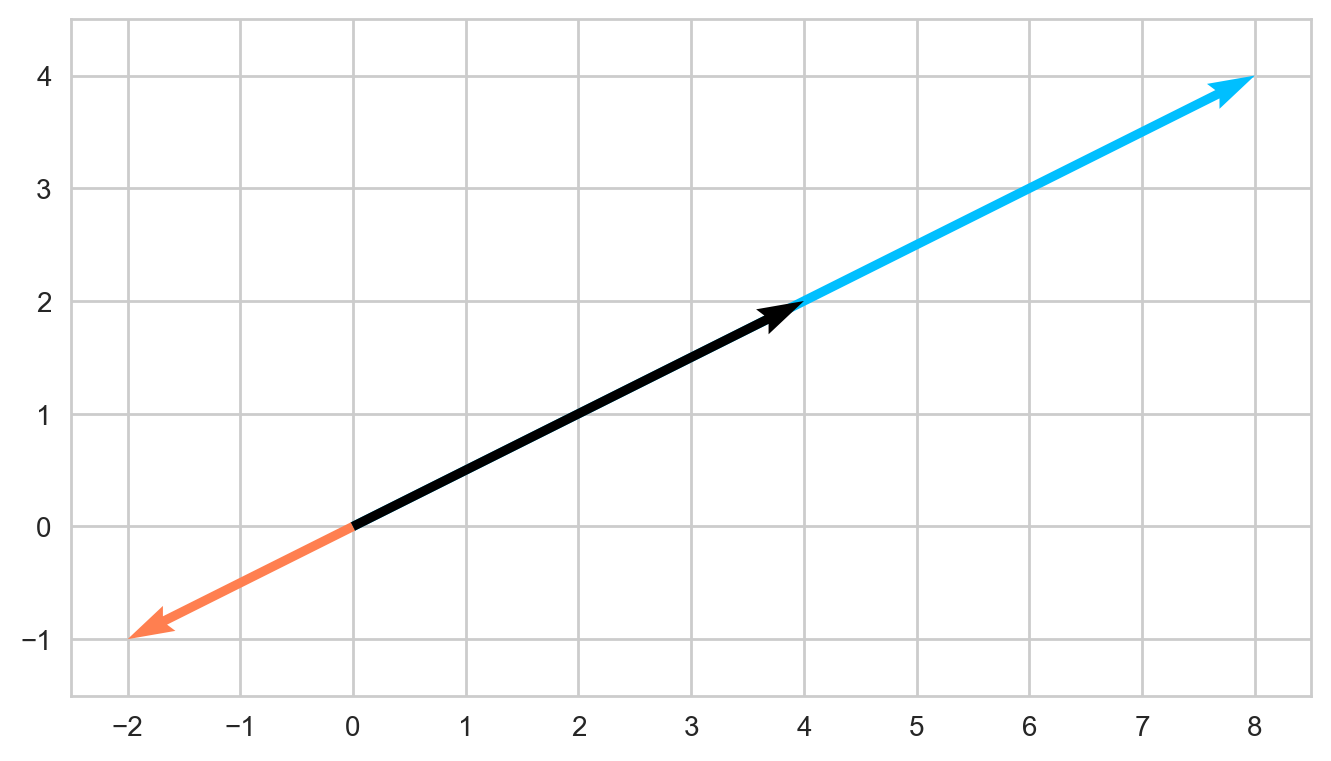

In [3]:
data = [
    [8, 4, 'deepskyblue'],
    [-2, -1, 'coral'],
    [4, 2, 'black'],
]

plot_vectors(data)

### 3.2. Column vectors
In a 2-dimensional $xy$-coordinates, we conventionally call $\mathbf{i}_1$ and $\mathbf{i}_2$ the [basis/unit vectors]:

$$\mathbf{i}_1=\begin{bmatrix}1\\0\end{bmatrix},\;\mathbf{i}_2=\begin{bmatrix}0\\1\end{bmatrix}$$

Any vector $\mathbf{a}$ can always be represented by these basis vectors, for example:

$$\mathbf{a}=\begin{bmatrix}3\\2\end{bmatrix}=3\mathbf{i}_1+2\mathbf{i}_2$$

Note that there are an infinite number of representations of $\mathbf{a}$. By convention, I use the origin as the *initial point* for all vectors. In other words, only the *terminal point* is neccessary to represent a vector.

[basis/unit vectors]: https://en.wikipedia.org/wiki/Basis_(linear_algebra)

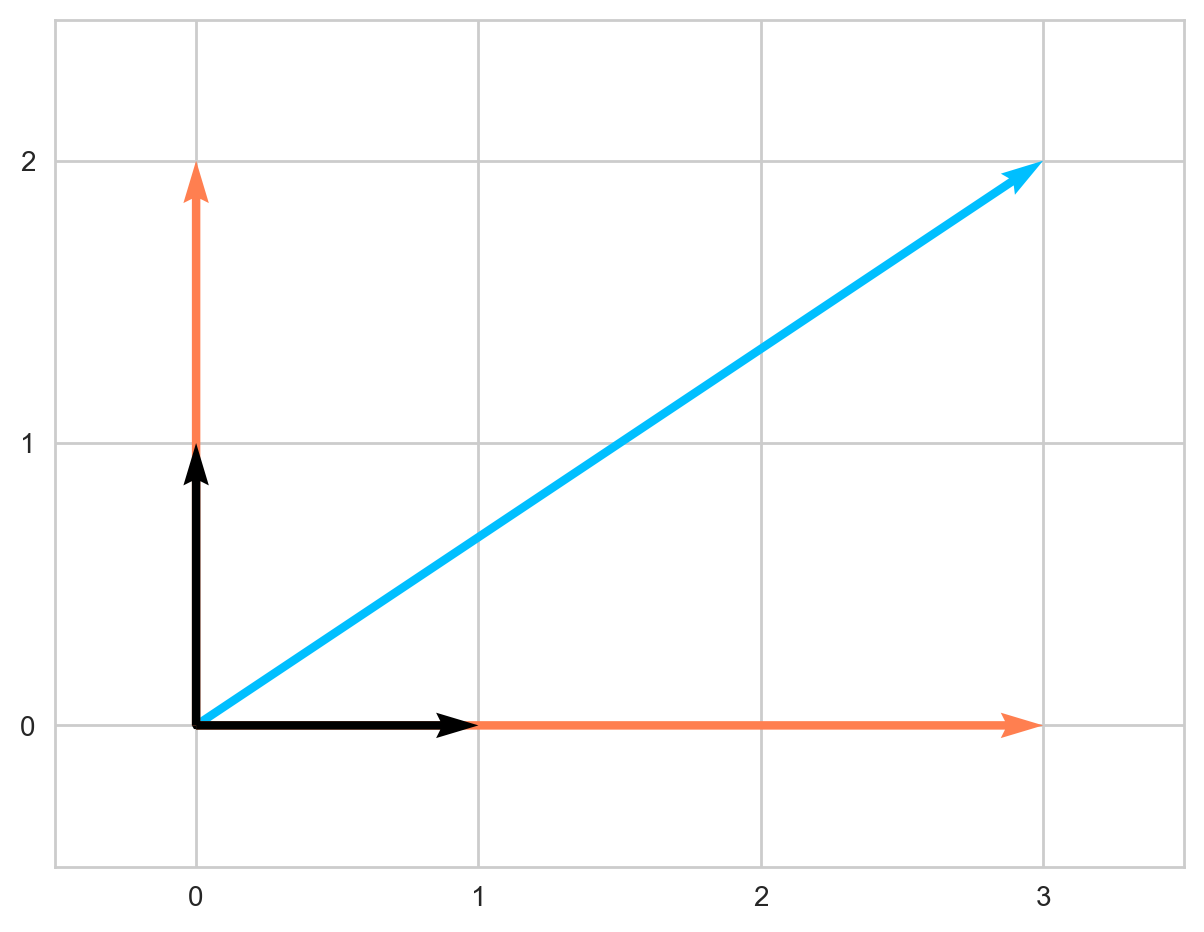

In [4]:
data = [
    [3, 2, 'deepskyblue'],
    [3, 0, 'coral'],
    [0, 2, 'coral'],
    [1, 0, 'black'],
    [0, 1, 'black'],
]

plot_vectors(data)

### 3.3. Square matrices
A square matrix represents a *change* of basis vectors. For example, let's consider the matrix:

$$\mathbf{A}=\begin{bmatrix}2&1\\0&3\end{bmatrix}$$

$\mathbf{A}$ represents a new coordinates system, in which $(\mathbf{a}_1,\mathbf{a}_2)$ become the new basis:

$$\mathbf{a}_1=\begin{bmatrix}2\\0\end{bmatrix},\;\mathbf{a}_2=\begin{bmatrix}1\\3\end{bmatrix}$$

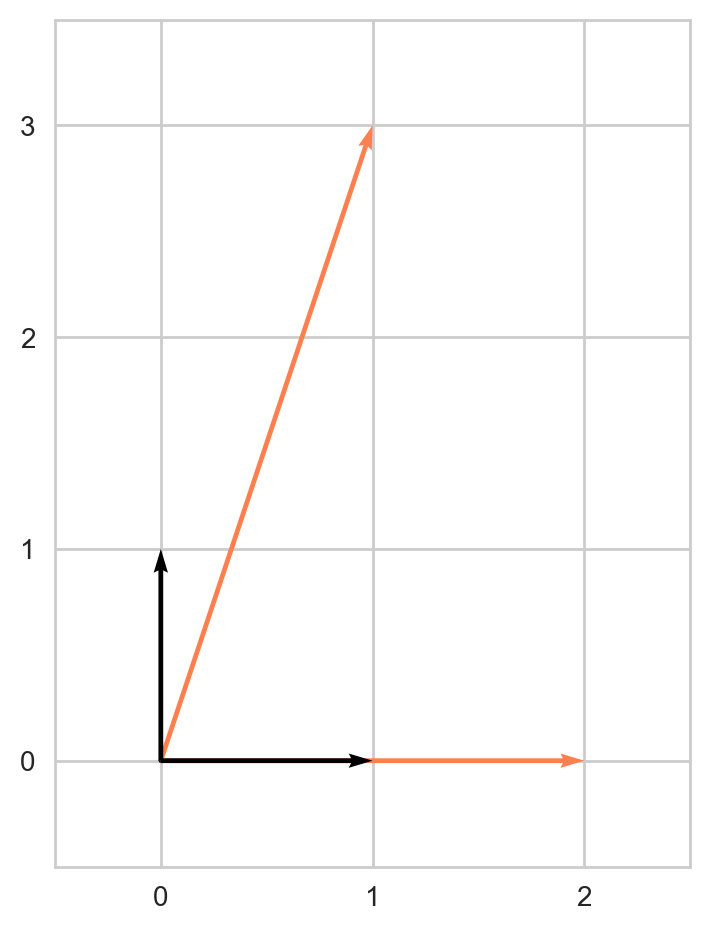

In [5]:
data = [
    [2, 0, 'coral'],
    [1, 3, 'coral'],
    [1, 0, 'black'],
    [0, 1, 'black'],
]

plot_vectors(data)

### 3.4. Dot product
In this part, we are going to discover the geometric meaning of the dot a product between a square matrix $\mathbf{A}_{N\times N}$ with a column vector $\mathbf{b}_{N\times 1}$. As far as we know, a square matrix can be thought as a *container* of new basis, where each column represents a basis vector:
$\mathbf{A}=[\mathbf{a}_1,\mathbf{a}_2,\dots,\mathbf{a}_N]$.
For a specific case of $N=2$, the dot product $\mathbf{Ab}$ is derived as follow:

$$
\mathbf{A}\mathbf{b} =
\begin{bmatrix}\begin{array}{r} 2&-1 \\ 0&1 \end{array}\end{bmatrix}
\begin{bmatrix}\begin{array}{r} 3 \\ 4 \end{array}\end{bmatrix}
=
3\begin{bmatrix}\begin{array}{r} 2 \\ 0 \end{array}\end{bmatrix} +
4\begin{bmatrix}\begin{array}{r} -1 \\ 1 \end{array}\end{bmatrix}
=
3\mathbf{a}_1+4\mathbf{a}_2
$$

By treating $\mathbf{A}$ as a set of new basis vectors, $(\mathbf{a}_1,\mathbf{a}_2)$, we can now construct a brand new coordinates system. The geometric meaning of the product $\mathbf{Ab}$ is where $\mathbf{b}$ points to in the new coordinates. A special case of dot product is when $\mathbf{A}$ is a unit matrix, then we have $\mathbf{b}=\mathbf{A}\mathbf{b}$. This equation tells us a unit matrix is just the same old representation of the original basis.

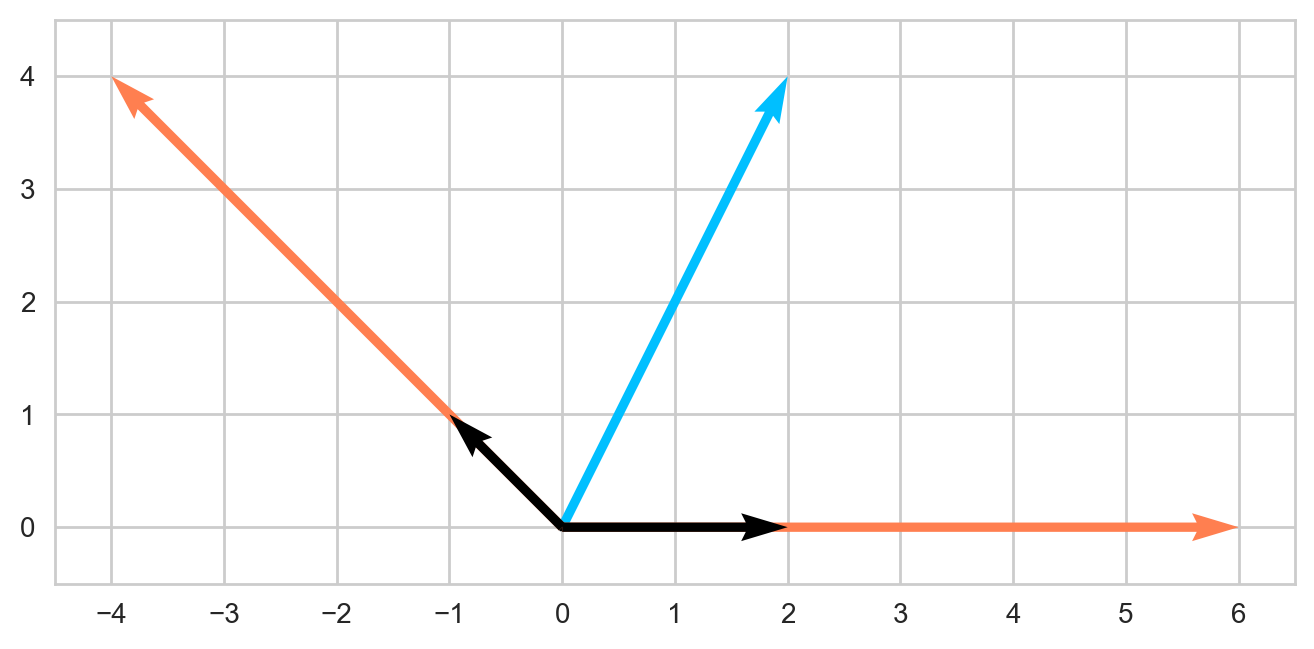

In [6]:
data = [
    [2, 4, 'deepskyblue'],
    [6, 0, 'coral'],
    [-4, 4, 'coral'],
    [2, 0, 'black'],
    [-1, 1, 'black'],
]

plot_vectors(data)

### 3.5. Determinant
The determinant of a matrix
$\mathbf{M}_{2\times 2}=\begin{bmatrix}\begin{array}{r} a&c \\ b&d \end{array}\end{bmatrix}$
is the area of the [parallellogram] formed by new basis vectors.

<img src="../image/chap-02/parallellogram.png" style="height:250px; margin:20px auto 20px;">

For the matrix
$\mathbf{R}_{3\times 3}=\left[\begin{array}{c|c|c|c}\mathbf{r}_1 & \mathbf{r}_2 & \mathbf{r}_3\end{array}\right]$,
its determinant is the volume of the [parallelepiped] formed by 3 new basis vectors.

<img src="../image/chap-02/parallelepiped.png" style="height:250px; margin:20px auto 20px;">

[parallellogram]: https://en.wikipedia.org/wiki/Parallelogram
[parallelepiped]: https://en.wikipedia.org/wiki/Parallelepiped

&#9800;&nbsp;<b>Note</b><br>
A square matrix has the determinant of $0$ only when there is at least one of its vectors is *linear dependent* on the others. Assume the matrix $\mathbf{R}_{3\times 3}$ above has the determinant of $0$, then it can be one of the following situations:
- There are at least one vector is $\mathbf{0}$
- There are at least a pair of vectors is parallel
- All three vectors lies in the same plane

Basically, if $\det\left(\mathbf{R}\right)=0$ then the new coordinates system has less than 3 dimensions.

### 3.6. Inverse
If a matrix $\mathbf{A}_{N\times N}$ changes the basis, then $\mathbf{A}^{-1}$ is the inverse transform that changes back to the old coordinates. The reason behind this is the equation $\mathbf{A}\cdot\mathbf{A}^{-1} = \mathbf{I}_N$.

If $\det\left(\mathbf{A}\right)=0$ then $\mathbf{A}$ maps the original coordinates into a new, lower dimensional space. In this case, the inverse transform cannot be performed; in other words, $\mathbf{A}$ is  *non-invertible*.